# Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import json

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Part 1 - Exploratory Data Analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
login_time = pd.read_json('logins.json',convert_dates=True)
x = login_time.login_time
y = list(login_time.index)

In [3]:
login_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
login_time.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


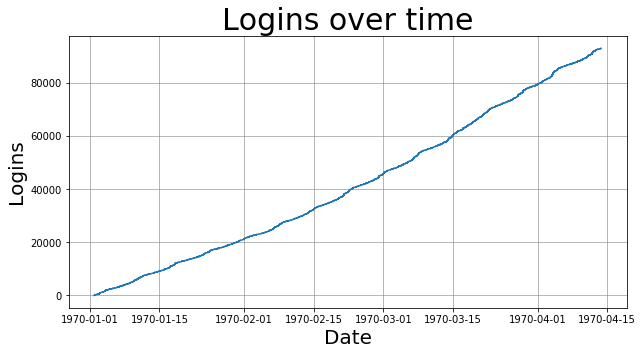

In [5]:
plt.figure(figsize = (10,5))
_ = plt.plot(x, y)
_ = plt.title('Logins over time', fontsize = 30)
_ = plt.xlabel('Date', fontsize=20)
_ = plt.ylabel('Logins', fontsize=20)
_ = plt.grid(which = 'major', axis = 'both', c = 'gray', alpha = 0.7)
plt.show()

In [6]:
login_15 = pd.Series(1,index=x).resample('15T').sum()
timeframe = login_15.index
count = login_15.values.tolist()

In [7]:
days = pd.Series(1,index=x).resample('D').count().index

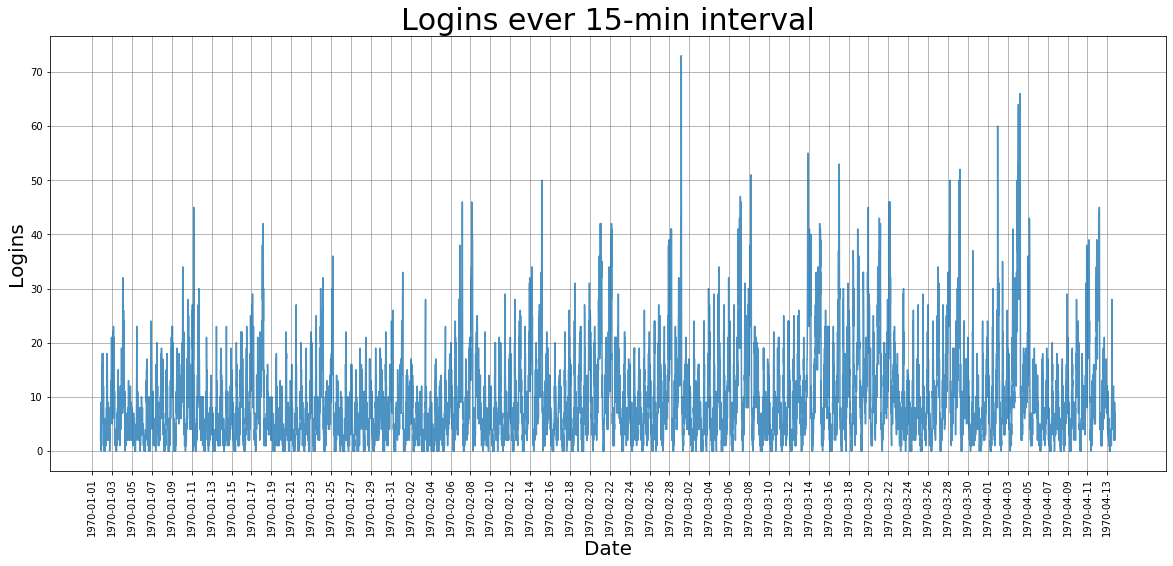

In [8]:
_ = plt.figure(figsize = (20,8))
_ = plt.plot(timeframe, count, alpha = 0.8)

_ = plt.xticks(days[::2], rotation=90)
_ = plt.title('Logins ever 15-min interval', fontsize = 30)
_ = plt.xlabel('Date', fontsize=20)
_ = plt.ylabel('Logins', fontsize=20)
_ = plt.grid(which = 'major', axis = 'both', c = 'gray', alpha = 0.7)
plt.show()

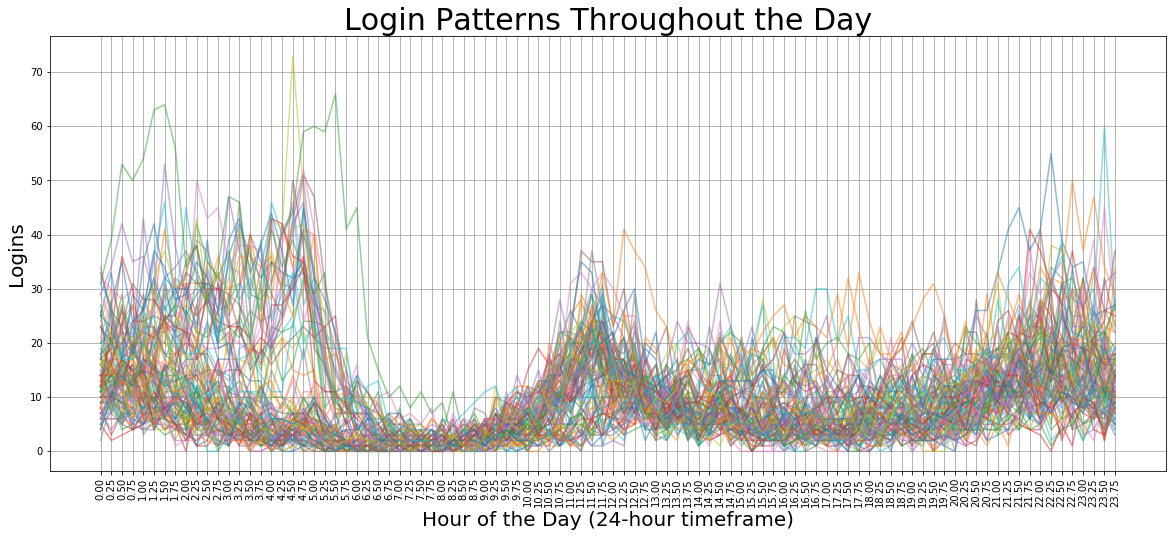

In [9]:
# Get x-axis ticks to represent 15-min segments of a day
x_daily = [(number*15)/60 for number in list(range(96))]

# Get total number of "full" days within dataset
max_days = math.floor(len(timeframe)/96)

_ = plt.figure(figsize = (20,8))

# Iterate over every day and superimpose each day on one another
for day in range(max_days):
    count_daily = count[16+(96*day):(16+(96*(day+1)))]
    _ = plt.plot(x_daily, count_daily, alpha = 0.5)

# Format graph
_ = plt.xticks(x_daily, rotation=90)
_ = plt.title('Login Patterns Throughout the Day', fontsize = 30)
_ = plt.xlabel('Hour of the Day (24-hour timeframe)', fontsize=20)
_ = plt.ylabel('Logins', fontsize=20)
_ = plt.grid(which = 'major', axis = 'both', c = 'gray', alpha = 0.7)

plt.show()

### Important features to note of the demand:

Superimposing the daily logins on top of one another shows that there is a higher demand from 00:00 hrs to 06:00 hrs, a decrease in logins from 06:00 hrs to 10:00 hrs, followed by an increase until about 13:00 hrs, then relatively steady until 20:00 hrs, then an increased demand at the end until the end of the day.

### Notes about data quality:

The login data associated with the first few hours before the "first" midnight were removed from the dataset so that the dataset would start at 00:00 hrs. The login data associated with the hours after the "last" midnight were removed from the dataset so that the dataset would end with a "full" day of data. This data removal was done so that only "full" days were plotted and analyzed.
 
***

# Part 2 - Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.<br>
<br>
However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
    <font color=red><br>
    - The number of tolls paid during the reimbursement program
    </font><br>
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:<br>
    a. how you will implement the experiment
    <font color=red><br>
    - Create a control group that pays tolls without the reimbursement program for one month.<br>
    - Create a test group that pays tolls with the reimbursement program for one month.<br>
    - Gather data from both groups to perform a comparison and measure the number of tolls paid with and without the reimbursement program.</font> <br>
    b. what statistical test(s) you will conduct to verify the significance of the observation
    <font color=red><br>
      - The following test seems to be a good fit for this experiment: null hypothesis and testing.
    </font><br>
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.
    <font color=red><br>
        - Using the null hypothesis and testing, the null hypothesis is that the reimbursement program does not change the mean number of tolls paid. The z-statistic would be most appropriate to calculate and compare with the critical value. If the z-statistic is lower than the critical value then we would accept the null hypothesis that the reimbursement program has no effect on driver partners, othersize we can reject the null hypothesis and lean more towards the alternative hypothesis that the reimbursement program does have an effect on driver partners.
    </font><br>

# Part 3 ‐ Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.<br>
<br>
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.<br>
<br>
The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.<br>
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?<br>
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.<br>
3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).

### Data description
- __city__: city this user signed up in
- __phone__: primary device for this user
- __signup_date__: date of account registration; in the form ‘YYYYMMDD’
- __last_trip_date__: the last time this user completed a trip; in the form ‘YYYYMMDD’
- __avg_dist__: the average distance in miles per trip taken in the first 30 days after signup
- __avg_rating_by_driver__: the rider’s average rating over all of their trips
- __avg_rating_of_driver__: the rider’s average rating of their drivers over all of their trips
- __surge_pct__: the percent of trips taken with surge multiplier > 1
- __avg_surge__: The average surge multiplier over all of this user’s trips
- __trips_in_first_30_days__: the number of trips this user took in the first 30 days after signing up
- __ultimate_black_user__: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- __weekday_pct__: the percent of the user’s trips occurring during a weekday

In [10]:
file = json.load(open('ultimate_data_challenge.json'))
ultimate_data = pd.DataFrame(file)

### Part 3.1

In [11]:
ultimate_data.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


In [12]:
ultimate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [13]:
ultimate_data_cleaned = ultimate_data.dropna()
ultimate_data_cleaned.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [14]:
ultimate_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
city                      41445 non-null object
trips_in_first_30_days    41445 non-null int64
signup_date               41445 non-null object
avg_rating_of_driver      41445 non-null float64
avg_surge                 41445 non-null float64
last_trip_date            41445 non-null object
phone                     41445 non-null object
surge_pct                 41445 non-null float64
ultimate_black_user       41445 non-null bool
weekday_pct               41445 non-null float64
avg_dist                  41445 non-null float64
avg_rating_by_driver      41445 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


In [15]:
df_ultimate = ultimate_data_cleaned.reset_index(drop=True)
df_ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [16]:
print(f'Number of observed users retained: {df_ultimate.shape[0]}')

Number of observed users retained: 41445


In [17]:
df_retained = df_ultimate.query("last_trip_date >= '2014-06-01'")

total_users = ultimate_data.shape[0]

print(f'Percent of users retained as riders: {round((df_retained.shape[0]/total_users)*100,2)}%')

Percent of users retained as riders: 34.07%


### Part 3.2

In [18]:
df_retained.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,17035.000000,17035.000000,17035.000000,17035.000000,17035.000000,17035.000000,17035.000000
mean,3.575756,4.592997,1.072826,9.142724,61.689257,4.908831,4.759630
std,5.132168,0.542454,0.142878,14.154435,27.614271,4.112530,0.295402
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,45.500000,2.570000,4.600000
50%,2.000000,4.800000,1.010000,2.500000,63.900000,3.690000,4.800000
75%,5.000000,5.000000,1.100000,14.300000,82.400000,5.660000,5.000000
max,125.000000,5.000000,4.500000,100.000000,100.000000,79.340000,5.000000


In [19]:
df_dropped = df_ultimate.query("last_trip_date < '2014-06-01'")

In [20]:
df_dropped.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,24410.000000,24410.000000,24410.000000,24410.000000,24410.000000,24410.000000,24410.000000
mean,1.935477,4.607808,1.074517,8.728419,60.951770,5.844723,4.788181
std,2.914006,0.662614,0.229827,20.738757,39.057475,5.725847,0.465537
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,31.600000,2.300000,4.800000
50%,1.000000,5.000000,1.000000,0.000000,66.700000,3.890000,5.000000
75%,2.000000,5.000000,1.000000,0.000000,100.000000,7.270000,5.000000
max,73.000000,5.000000,8.000000,100.000000,100.000000,79.690000,5.000000


Comparing the mean and standard deviation for each of the features between the users that are considered "retained" versus the users that are considered to have "dropped" their Ultimate account, most features have similar or close means and standard deviations. However, one feature called "trips_in_first_30_days" looks like it has a differing mean and standard deviation between the two groups that this feature is worth exploring more.

In [21]:
retained_mean = np.mean(df_retained['trips_in_first_30_days'])
retained_std = np.std(df_retained['trips_in_first_30_days'])

dropped_mean = np.mean(df_dropped['trips_in_first_30_days'])
dropped_std = np.std(df_dropped['trips_in_first_30_days'])

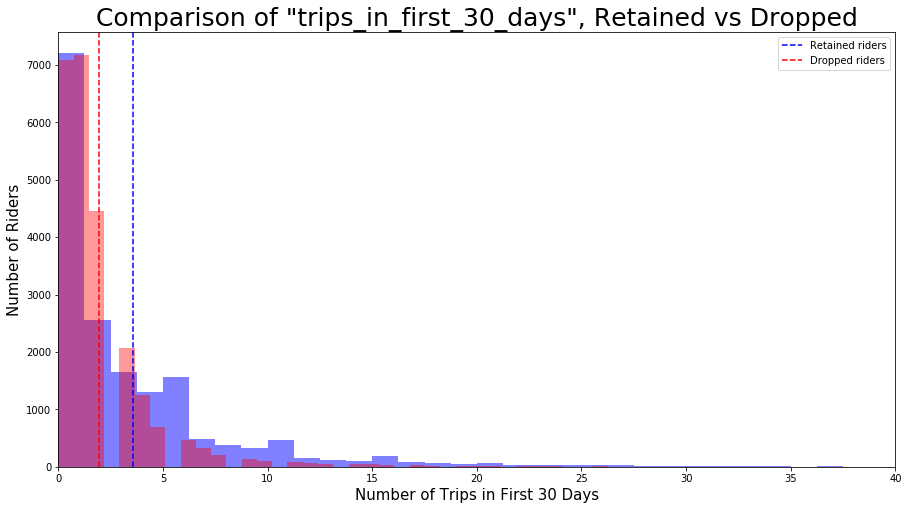

In [22]:
plt.figure(figsize=(15,8))
plt.hist(df_retained['trips_in_first_30_days'], bins=100, color='blue', alpha=0.5)
plt.axvline(retained_mean, color='b', linestyle='--')

plt.hist(df_dropped['trips_in_first_30_days'], bins=100, color='red', alpha= 0.4)
plt.axvline(dropped_mean, color='r', linestyle='--')

plt.xlim(0,40)
plt.xlabel('Number of Trips in First 30 Days', fontsize=15)
plt.ylabel('Number of Riders', fontsize=15)
plt.title('Comparison of "trips_in_first_30_days", Retained vs Dropped', fontsize=25)

plt.legend(['Retained riders', 'Dropped riders'])

plt.show()

In [23]:
print(f"Mean trips in first 30 days for riders that were retained is: {round(retained_mean, 2)}")
print(f"Standard deviation for retained riders: {round(retained_std,2)}")

Mean trips in first 30 days for riders that were retained is: 3.58
Standard deviation for retained riders: 5.13


In [24]:
print(f"Mean trips in first 30 days for riders that dropped is: {round(dropped_mean, 2)}")
print(f"Standard deviation for riders that dropped: {round(dropped_std,2)}")

Mean trips in first 30 days for riders that dropped is: 1.94
Standard deviation for riders that dropped: 2.91


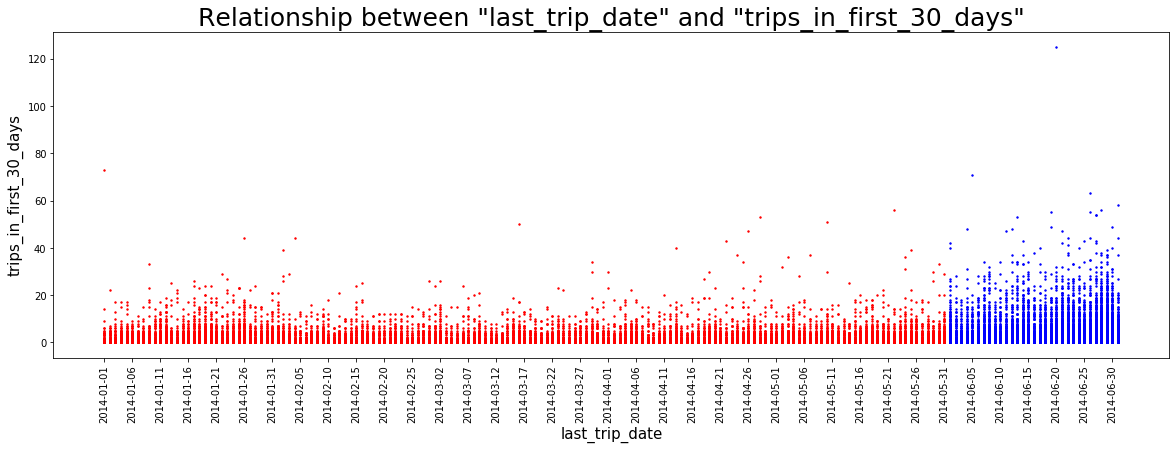

In [25]:
x_variable = 'last_trip_date'
y_variable = 'trips_in_first_30_days'

def PlotRelationship(x_variable, y_variable):
    plt.figure(figsize = (20, 6))
    plt.scatter(df_dropped[x_variable].sort_values(),
                df_dropped[y_variable], color='r', s=2)
    plt.scatter(df_retained[x_variable].sort_values(),
                df_retained[y_variable], color='b', s=2)

    plt.xticks(df_ultimate[x_variable].sort_values().unique()[::5], rotation=90)

    plt.xlabel(x_variable, fontsize=15)
    plt.ylabel(y_variable, fontsize=15)
    plt.title(f'Relationship between "{x_variable}" and "{y_variable}"' , fontsize=25)

    plt.show()
    
PlotRelationship(x_variable, y_variable)

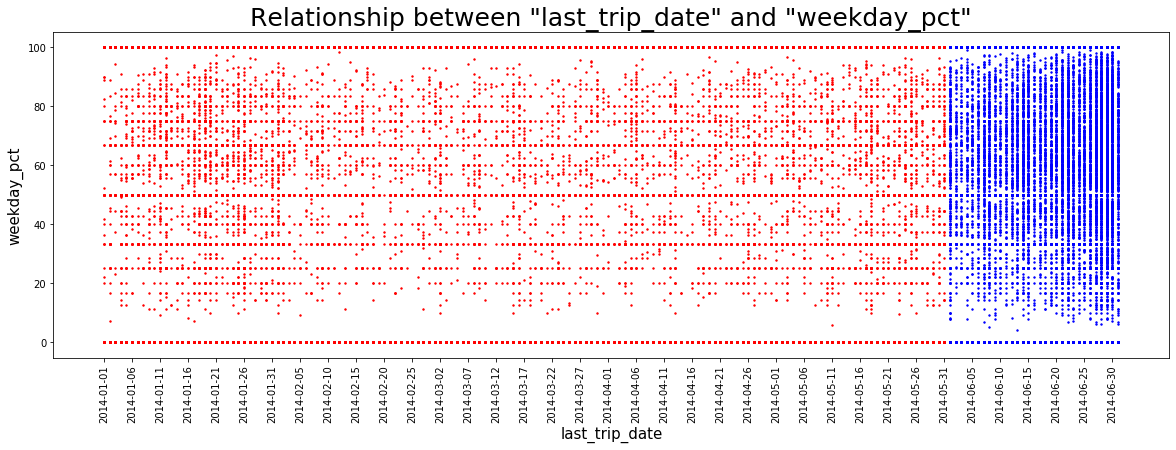

In [26]:
x_variable = 'last_trip_date'
y_variable = 'weekday_pct'

PlotRelationship(x_variable, y_variable)

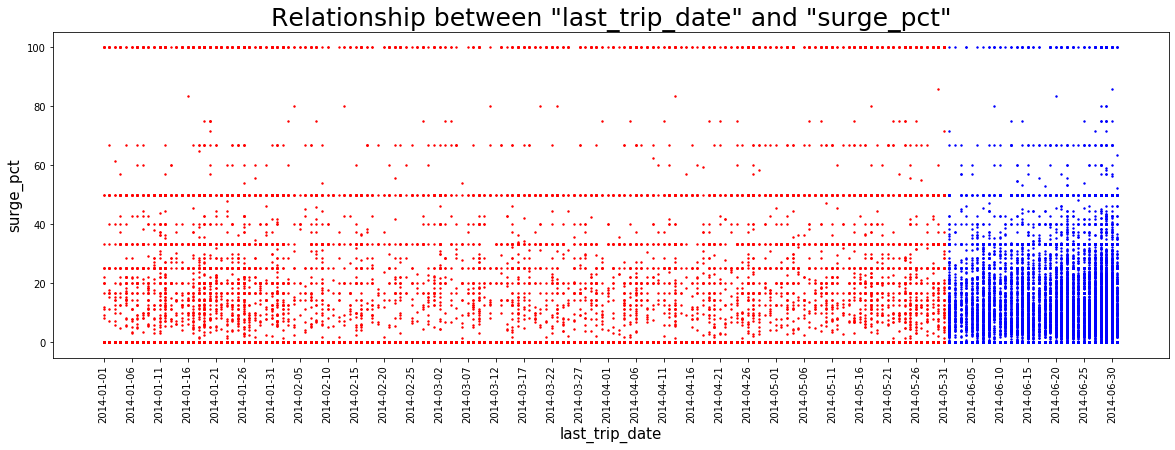

In [27]:
x_variable = 'last_trip_date'
y_variable = 'surge_pct'

PlotRelationship(x_variable, y_variable)

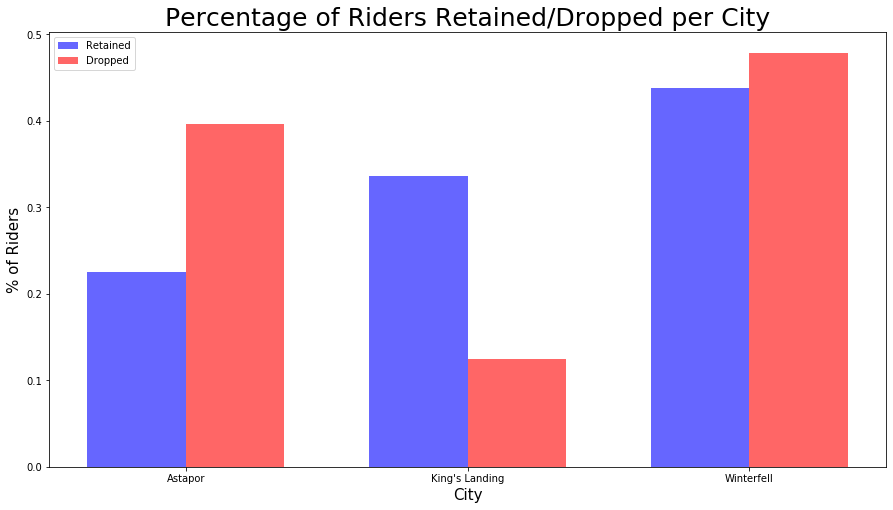

In [28]:
cities = list(df_retained.city.value_counts(normalize=True).sort_index().index)

x = np.arange(len(cities))
width = 0.35  # the width of the bars

height_retained = list(df_retained.city.value_counts(normalize=True).sort_index().values)
height_dropped = list(df_dropped.city.value_counts(normalize=True).sort_index().values)

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x - width/2, height_retained, width, color = 'b', label='Retained', alpha = 0.6)
ax.bar(x + width/2, height_dropped, width, color='r', label='Dropped', alpha = 0.6)

ax.legend()

ax.set_xticks(x)
ax.set_xticklabels(cities)

ax.set_xlabel('City', fontsize=15)
ax.set_ylabel('% of Riders', fontsize=15)
ax.set_title('Percentage of Riders Retained/Dropped per City' , fontsize=25)

plt.show()

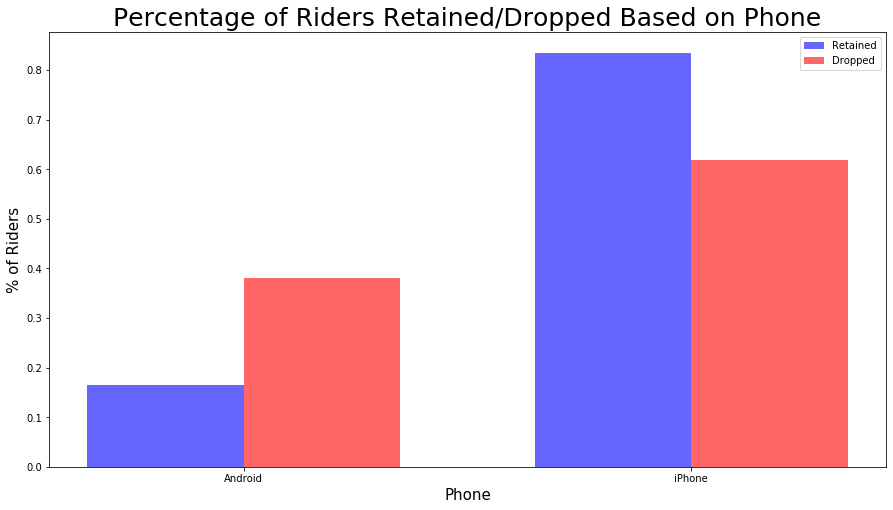

In [29]:
phones = list(df_retained.phone.value_counts(normalize=True).sort_index().index)

x = np.arange(len(phones))
width = 0.35  # the width of the bars

height_retained = list(df_retained.phone.value_counts(normalize=True).sort_index().values)
height_dropped = list(df_dropped.phone.value_counts(normalize=True).sort_index().values)

fig, ax = plt.subplots(figsize=(15,8))

ax.bar(x - width/2, height_retained, width, color = 'b', label='Retained', alpha = 0.6)
ax.bar(x + width/2, height_dropped, width, color='r', label='Dropped', alpha = 0.6)

ax.legend()

ax.set_xticks(x)
ax.set_xticklabels(phones)

ax.set_xlabel('Phone', fontsize=15)
ax.set_ylabel('% of Riders', fontsize=15)
ax.set_title('Percentage of Riders Retained/Dropped Based on Phone' , fontsize=25)

plt.show()

In [30]:
df_ultimate_vect = df_ultimate.copy()

df_ultimate_vect['kings_landing'] = (df_ultimate_vect.city == "King's Landing").astype(int)
df_ultimate_vect['winterfell'] = (df_ultimate_vect.city == "Winterfell").astype(int)
df_ultimate_vect['astapor'] = (df_ultimate_vect.city == "Astapor").astype(int)
df_ultimate_vect['iphone'] = (df_ultimate_vect.phone == "iPhone").astype(int)
df_ultimate_vect['android'] = (df_ultimate_vect.phone == "Android").astype(int)
df_ultimate_vect['rider_retained'] = (df_ultimate_vect.last_trip_date >= '2014-06-01').astype(int)

In [31]:
X = df_ultimate_vect[['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'kings_landing', 'winterfell', 'astapor',
       'iphone', 'android']]
rider_retained = df_ultimate_vect['rider_retained']

In [32]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [33]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m_all = ols('rider_retained ~ trips_in_first_30_days + iphone + android + kings_landing + winterfell + astapor',
        df_ultimate_vect).fit()
print(m_all.summary())

                            OLS Regression Results                            
Dep. Variable:         rider_retained   R-squared:                       0.153
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     1875.
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:32:40   Log-Likelihood:                -25966.
No. Observations:               41445   AIC:                         5.194e+04
Df Residuals:                   41440   BIC:                         5.199e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [34]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m_top = ols('rider_retained ~ trips_in_first_30_days + iphone + kings_landing',
        df_ultimate_vect).fit()
print(m_top.summary())

                            OLS Regression Results                            
Dep. Variable:         rider_retained   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     2371.
Date:                Sat, 18 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:32:40   Log-Likelihood:                -26131.
No. Observations:               41445   AIC:                         5.227e+04
Df Residuals:                   41441   BIC:                         5.230e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

In [35]:
print(f'F-statistic value for m_all: {round(m_all.fvalue, 2)}')
print(f'F-statistic value for m_top: {round(m_top.fvalue, 2)}')

F-statistic value for m_all: 1875.18
F-statistic value for m_top: 2371.39


### Part 3.3

The f-statistic value is a good indicator to use to determine if certain variables are good predictors for a model. Given the f-statistic value of about 2371 when only looking at the variables "trips_in_first_30_days," "iphone," and "kings_landing," (which is about 500 points higher compared to using all the variables) I would recommend that the following variables are good indicators to look out for when determining if a rider will be retained 6 months later:<br>
  - Amount of trips for a rider in the first 30 days
  - Whether a rider is using an iPhone
  - Whether a rider is from King's Landing

These three variables are better predictors that a rider will be retained.<br>
<br>
Given the variables that may be better predictors for retaining riders long-term, I think that this now gives insight into other areas that are not as strong to convert riders to be retained long-term. For example, the retention of riders with Android phones is not as high as riders with iPhones. Ultimate can perhaps have a team investigate why riders with Android phones aren't being retained as much. Is it because of the the user interface? Is there something about the Android app that is not very user-friendly to navigate?